In [4]:
%load_ext autoreload
%autoreload 2

import os
import gym 
from matplotlib import pyplot as plt
import numpy as np
from ddpg_torch.ddpg_agent import Agent
from envs.escape_room_continuous_space_env import EscapeRoomEnv
from tqdm import trange
import seaborn as sns
from constants import (
    CHECKPOINT_RADIUS,
    ENV_HEIGHT,
    ENV_WIDTH,
    MAX_WHEEL_VELOCITY,
    SCALE_FACTOR,
)


In [3]:
# Goal (550, 450)

def train_diff_robot_custom_env(alpha=0.00001, beta=0.0001, tau=0.001, n_games=5000):
    env = EscapeRoomEnv(max_steps_per_episode=3000, goal = (550 , 450))
    agent = Agent(
        alpha=alpha,
        beta=beta,
        input_dims=env.observation_space.shape,
        tau=tau,
        batch_size=64,
        fc1_dims=400,
        fc2_dims=300,
        n_actions=env.action_space.shape[0],
    )

    filename = f"EscapeRoom_alpha_{agent.alpha}_beta_{agent.beta}_{n_games}_games"
    figure_file = f"plots/{filename}.png"
    score_history = []
    critic_losses = []
    actor_losses = []
    rewards = []
    actions = []
    states = []
    next_states = []

    save_interval = n_games // 10  # Save model and plot every 10% of n_games
    pbar = trange(n_games)

    for i in pbar:
        state, info = env.reset()
        done = False
        score = 0

        while not done:
            action = agent.choose_action(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            agent.remember(state, action, reward, next_state, done)
            learn_outputs = agent.learn()
            if learn_outputs:
                critic_loss, actor_loss = learn_outputs
            else:
                critic_loss, actor_loss = (0, 0)  # Default values when learning doesn't happen

            score += reward
            state = next_state

            # Collect data for analysis
            rewards.append(reward)
            actions.append(action)
            states.append(state)
            next_states.append(next_state)
            score_history.append(score)
            critic_losses.append(critic_loss)
            actor_losses.append(actor_loss)

        avg_score = np.mean(score_history)  # Calculate average score after appending current score

        if i % save_interval == 0 or i == n_games - 1:  # Save model and plot at intervals
            agent.save_models()

        pbar.set_description(
            f"Episode {i}: Score {score:.1f}, Info : {info['reason']}, Average Score {avg_score:.3f}, Actor Losses {actor_losses[-1]:.3f}, Critic Losses {critic_losses[-1]:.3f}"
        )

    return {
        "no_of_games" : n_games,
        "score_history": score_history,
        "critic_losses": critic_losses,
        "actor_losses": actor_losses,
        "rewards": rewards,
        "actions": actions,
        "states": states,
        "next_states": next_states,
        "figure_file": figure_file
    }

In [4]:
training_data = train_diff_robot_custom_env()

/home/deep/.local/lib/python3.10/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
  0%|          | 0/5000 [00:00<?, ?it/s]/home/deep/data/NEU/RL/Project/Project_Deep/Enhancing_Autonomous_Robot_Navigation_with_DRL/ddpg_torch/ddpg_agent.py:64: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  state = T.tensor([observation], dtype=T.float).to(self.actor.device)
Episode 2622: Score 4562.9, Info : Goal_reached, Average Score -786.814, Actor Losses -47.130, Critic Losses 3.288:  52%|█████▏    | 2623/5000 [2:17:40<2:33:53,  3.88s/it]        

Goal 'G' reached in 1514 steps with cumulative reward 5547.042785125184 for this episode.


Episode 2873: Score 5904.9, Info : Goal_reached, Average Score -714.288, Actor Losses -48.230, Critic Losses 20.284:  57%|█████▋    | 2874/5000 [2:38:28<2:54:40,  4.93s/it]      

Goal 'G' reached in 1027 steps with cumulative reward 5685.137461400792 for this episode.


Episode 3118: Score 5997.2, Info : Goal_reached, Average Score -662.454, Actor Losses -58.424, Critic Losses 386.049:  62%|██████▏   | 3119/5000 [2:56:55<1:45:40,  3.37s/it]      

Goal 'G' reached in 924 steps with cumulative reward 5723.565918866904 for this episode.


Episode 3136: Score 5032.3, Info : Goal_reached, Average Score -667.330, Actor Losses -69.315, Critic Losses 3.475:  63%|██████▎   | 3137/5000 [2:57:52<2:39:26,  5.14s/it]        

Goal 'G' reached in 2531 steps with cumulative reward 5391.289070248816 for this episode.


Episode 3150: Score 6077.2, Info : Goal_reached, Average Score -662.634, Actor Losses -65.476, Critic Losses 20.321:  63%|██████▎   | 3151/5000 [2:59:18<1:51:00,  3.60s/it]     

Goal 'G' reached in 453 steps with cumulative reward 6017.735158437532 for this episode.


Episode 3151: Score 6221.8, Info : Goal_reached, Average Score -662.565, Actor Losses -66.814, Critic Losses 1.259:  63%|██████▎   | 3152/5000 [2:59:19<1:27:53,  2.85s/it] 

Goal 'G' reached in 305 steps with cumulative reward 6192.909270096605 for this episode.


Episode 3658: Score 5376.2, Info : Goal_reached, Average Score -619.019, Actor Losses -63.988, Critic Losses 3.225:  73%|███████▎  | 3659/5000 [3:30:21<1:08:50,  3.08s/it]        

Goal 'G' reached in 1589 steps with cumulative reward 5531.166283222166 for this episode.


Episode 3872: Score 6015.1, Info : Goal_reached, Average Score -616.383, Actor Losses -50.558, Critic Losses 31.123:  77%|███████▋  | 3873/5000 [3:49:44<2:16:37,  7.27s/it]      

Goal 'G' reached in 618 steps with cumulative reward 5884.472459639492 for this episode.


Episode 3936: Score 3840.4, Info : Goal_reached, Average Score -610.942, Actor Losses -63.617, Critic Losses 7.239:  79%|███████▊  | 3937/5000 [3:56:14<2:25:35,  8.22s/it]       

Goal 'G' reached in 968 steps with cumulative reward 5706.637931706636 for this episode.


Episode 3989: Score 5942.9, Info : Goal_reached, Average Score -613.001, Actor Losses -62.666, Critic Losses 5.277:  80%|███████▉  | 3990/5000 [4:04:12<2:32:11,  9.04s/it]       

Goal 'G' reached in 2507 steps with cumulative reward 5394.0866116898205 for this episode.


Episode 3993: Score 5684.2, Info : Goal_reached, Average Score -612.169, Actor Losses -72.655, Critic Losses 19.321:  80%|███████▉  | 3994/5000 [4:04:53<2:44:00,  9.78s/it]     

Goal 'G' reached in 2549 steps with cumulative reward 5391.210308499538 for this episode.


Episode 4224: Score 6516.1, Info : Goal_reached, Average Score -606.849, Actor Losses -68.282, Critic Losses 127.479:  84%|████████▍ | 4225/5000 [4:25:25<32:45,  2.54s/it]        

Goal 'G' reached in 224 steps with cumulative reward 6335.533101998951 for this episode.


Episode 4289: Score 5932.8, Info : Goal_reached, Average Score -596.498, Actor Losses -69.182, Critic Losses 9.876:  86%|████████▌ | 4290/5000 [4:31:56<1:04:46,  5.47s/it]      

Goal 'G' reached in 370 steps with cumulative reward 6105.535239067764 for this episode.


Episode 4290: Score 2363.7, Info : Goal_reached, Average Score -596.760, Actor Losses -64.056, Critic Losses 16.794:  86%|████████▌ | 4291/5000 [4:31:59<57:31,  4.87s/it]  

Goal 'G' reached in 938 steps with cumulative reward 5719.122805350668 for this episode.


Episode 4500: Score 5675.4, Info : Goal_reached, Average Score -603.482, Actor Losses -54.675, Critic Losses 12.520:  90%|█████████ | 4501/5000 [4:44:24<38:34,  4.64s/it]        

Goal 'G' reached in 733 steps with cumulative reward 5814.658731230048 for this episode.


Episode 4527: Score 6037.7, Info : Goal_reached, Average Score -606.025, Actor Losses -60.990, Critic Losses 258.827:  91%|█████████ | 4528/5000 [4:47:28<15:13,  1.93s/it]       

Goal 'G' reached in 702 steps with cumulative reward 5832.180174563872 for this episode.


Episode 4716: Score 4768.6, Info : Goal_reached, Average Score -603.616, Actor Losses -71.299, Critic Losses 252.799:  94%|█████████▍| 4717/5000 [5:07:16<43:23,  9.20s/it]       

Goal 'G' reached in 2963 steps with cumulative reward 5350.518170361261 for this episode.


Episode 4726: Score 6186.1, Info : Goal_reached, Average Score -602.014, Actor Losses -74.875, Critic Losses 8.032:  95%|█████████▍| 4727/5000 [5:08:36<22:15,  4.89s/it]       

Goal 'G' reached in 485 steps with cumulative reward 5987.766887364093 for this episode.


Episode 4730: Score 6149.1, Info : Goal_reached, Average Score -602.260, Actor Losses -65.257, Critic Losses 5.333:  95%|█████████▍| 4731/5000 [5:09:04<25:54,  5.78s/it]     

Goal 'G' reached in 479 steps with cumulative reward 5992.3377340114 for this episode.


Episode 4738: Score 6819.1, Info : Goal_reached, Average Score -600.767, Actor Losses -79.211, Critic Losses 7.216:  95%|█████████▍| 4739/5000 [5:09:54<23:22,  5.37s/it]     

Goal 'G' reached in 110 steps with cumulative reward 6672.774575051227 for this episode.


Episode 4742: Score 6179.8, Info : Goal_reached, Average Score -600.685, Actor Losses -59.183, Critic Losses 79.762:  95%|█████████▍| 4743/5000 [5:10:09<14:45,  3.44s/it] 

Goal 'G' reached in 440 steps with cumulative reward 6029.67504815789 for this episode.


Episode 4750: Score 5770.6, Info : Goal_reached, Average Score -600.711, Actor Losses -69.029, Critic Losses 70.759:  95%|█████████▌| 4751/5000 [5:11:08<25:50,  6.23s/it]      

Goal 'G' reached in 1050 steps with cumulative reward 5675.882326013682 for this episode.


Episode 4753: Score 3000.4, Info : Goal_reached, Average Score -601.488, Actor Losses -76.468, Critic Losses 5.348:  95%|█████████▌| 4754/5000 [5:11:30<30:55,  7.54s/it]       

Goal 'G' reached in 2669 steps with cumulative reward 5378.703051332075 for this episode.


Episode 4754: Score -15.3, Info : out_of_bounds, Average Score -601.466, Actor Losses -73.023, Critic Losses 10.930:  95%|█████████▌| 4755/5000 [5:11:31<22:36,  5.54s/it]

Goal 'G' reached in 271 steps with cumulative reward 6246.164255062493 for this episode.


Episode 4756: Score 4296.7, Info : Goal_reached, Average Score -601.423, Actor Losses -74.831, Critic Losses 6.539:  95%|█████████▌| 4757/5000 [5:11:42<23:35,  5.83s/it]  

Goal 'G' reached in 2711 steps with cumulative reward 5373.419006693054 for this episode.


Episode 4760: Score 5927.8, Info : Goal_reached, Average Score -600.913, Actor Losses -79.385, Critic Losses 66.756:  95%|█████████▌| 4761/5000 [5:12:14<26:50,  6.74s/it]     

Goal 'G' reached in 1041 steps with cumulative reward 5678.9475963639725 for this episode.


Episode 4767: Score 6220.2, Info : Goal_reached, Average Score -600.407, Actor Losses -71.440, Critic Losses 77.373:  95%|█████████▌| 4768/5000 [5:12:35<14:18,  3.70s/it]  

Goal 'G' reached in 363 steps with cumulative reward 6113.990587035948 for this episode.


Episode 4768: Score 6446.4, Info : Goal_reached, Average Score -600.379, Actor Losses -78.529, Critic Losses 11.723:  95%|█████████▌| 4769/5000 [5:12:36<11:01,  2.87s/it]

Goal 'G' reached in 237 steps with cumulative reward 6307.9766211195065 for this episode.


Episode 4769: Score 5924.4, Info : Goal_reached, Average Score -600.281, Actor Losses -78.808, Critic Losses 11.715:  95%|█████████▌| 4770/5000 [5:12:39<10:53,  2.84s/it]

Goal 'G' reached in 774 steps with cumulative reward 5792.993386908874 for this episode.


Episode 4771: Score 6593.5, Info : Goal_reached, Average Score -600.106, Actor Losses -69.073, Critic Losses 6.311:  95%|█████████▌| 4772/5000 [5:12:44<09:11,  2.42s/it] 

Goal 'G' reached in 177 steps with cumulative reward 6445.69380841405 for this episode.


Episode 4773: Score 6537.6, Info : Goal_reached, Average Score -600.067, Actor Losses -77.706, Critic Losses 6.790:  95%|█████████▌| 4774/5000 [5:12:45<05:47,  1.54s/it]

Goal 'G' reached in 169 steps with cumulative reward 6466.526801920592 for this episode.


Episode 4774: Score 6805.4, Info : Goal_reached, Average Score -600.053, Actor Losses -77.298, Critic Losses 12.681:  96%|█████████▌| 4775/5000 [5:12:46<04:40,  1.25s/it]

Goal 'G' reached in 108 steps with cumulative reward 6679.866498313934 for this episode.


Episode 4777: Score 6631.5, Info : Goal_reached, Average Score -600.007, Actor Losses -70.190, Critic Losses 7.481:  96%|█████████▌| 4778/5000 [5:12:47<03:06,  1.19it/s]  

Goal 'G' reached in 161 steps with cumulative reward 6490.55435903302 for this episode.


Episode 4780: Score 6223.0, Info : Goal_reached, Average Score -599.924, Actor Losses -70.583, Critic Losses 16.727:  96%|█████████▌| 4781/5000 [5:12:50<03:32,  1.03it/s]

Goal 'G' reached in 273 steps with cumulative reward 6242.932385219478 for this episode.


Episode 4781: Score 6140.3, Info : Goal_reached, Average Score -599.873, Actor Losses -67.140, Critic Losses 20.676:  96%|█████████▌| 4782/5000 [5:12:52<04:18,  1.19s/it]

Goal 'G' reached in 418 steps with cumulative reward 6051.348712901289 for this episode.


Episode 4785: Score 6459.1, Info : Goal_reached, Average Score -599.280, Actor Losses -77.897, Critic Losses 6.526:  96%|█████████▌| 4786/5000 [5:13:12<11:25,  3.20s/it]    

Goal 'G' reached in 265 steps with cumulative reward 6257.475325890345 for this episode.


Episode 4793: Score 4413.9, Info : Goal_reached, Average Score -599.101, Actor Losses -78.638, Critic Losses 6.405:  96%|█████████▌| 4794/5000 [5:13:20<04:02,  1.18s/it] 

Goal 'G' reached in 459 steps with cumulative reward 6010.760951129972 for this episode.


Episode 4999: Score -138.1, Info : out_of_bounds, Average Score -610.455, Actor Losses -163.345, Critic Losses 431.812: 100%|██████████| 5000/5000 [5:17:53<00:00,  3.81s/it]       


In [5]:

def plot_training_results(training_data):
    n_games = np.array(training_data['no_of_games'])
    scores = np.array(training_data['score_history'])
    critic_losses = np.array(training_data['critic_losses'])
    actor_losses = np.array(training_data['actor_losses'])
    figure_file = training_data['figure_file']

    # Determine the average number of steps per episode from the length of scores and n_games
    steps_per_episode = len(scores) // n_games
    num_episodes = n_games  # Directly use the number of games as the number of episodes

    episodes = np.arange(1, num_episodes + 1)

    # Reshape and average the scores and losses per episode
    scores_per_episode = scores[:num_episodes * steps_per_episode].reshape(num_episodes, steps_per_episode).mean(axis=1)
    critic_losses_per_episode = critic_losses[:num_episodes * steps_per_episode].reshape(num_episodes, steps_per_episode).mean(axis=1)
    actor_losses_per_episode = actor_losses[:num_episodes * steps_per_episode].reshape(num_episodes, steps_per_episode).mean(axis=1)

    # Calculate means
    mean_score = np.mean(scores_per_episode)
    mean_critic_loss = np.mean(critic_losses_per_episode)
    mean_actor_loss = np.mean(actor_losses_per_episode)

    # Create subplots
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plotting the scores
    axs[0].plot(episodes, scores_per_episode, label='Average Score per Episode', color='blue')
    axs[0].axhline(mean_score, color='gray', linestyle='--', label=f'Mean Score: {mean_score:.2f}')
    axs[0].set_title('Average Scores Over Episodes')
    axs[0].set_xlabel('Episode')
    axs[0].set_ylabel('Average Score')
    axs[0].grid(True)
    axs[0].legend()

    # Plotting the critic losses
    axs[1].plot(episodes, critic_losses_per_episode, label='Average Critic Loss per Episode', color='red')
    axs[1].axhline(mean_critic_loss, color='gray', linestyle='--', label=f'Mean Critic Loss: {mean_critic_loss:.2f}')
    axs[1].set_title('Average Critic Loss Over Episodes')
    axs[1].set_xlabel('Episode')
    axs[1].set_ylabel('Average Loss')
    axs[1].grid(True)
    axs[1].legend()

    # Plotting the actor losses
    axs[2].plot(episodes, actor_losses_per_episode, label='Average Actor Loss per Episode', color='green')
    axs[2].axhline(mean_actor_loss, color='gray', linestyle='--', label=f'Mean Actor Loss: {mean_actor_loss:.2f}')
    axs[2].set_title('Average Actor Loss Over Episodes')
    axs[2].set_xlabel('Episode')
    axs[2].set_ylabel('Average Loss')
    axs[2].grid(True)
    axs[2].legend()

    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()


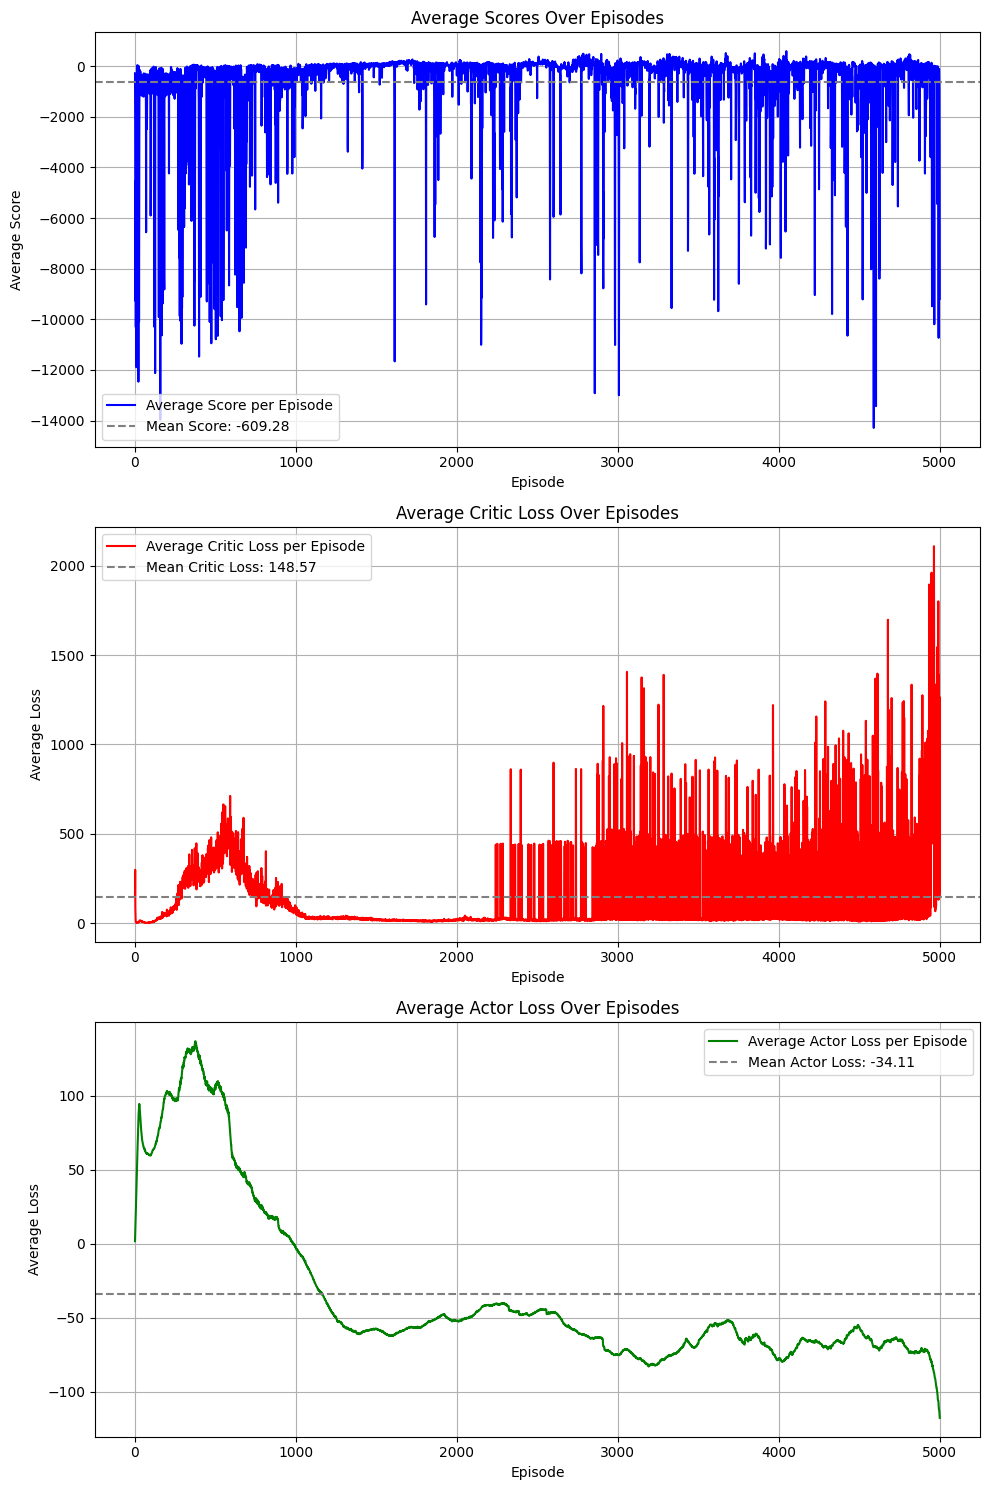

In [6]:
plot_training_results(training_data)

In [7]:
def plot_action_frequency_heatmap(actions):
    actions = np.array(actions)
    plt.figure(figsize=(10, 8))
    if actions.ndim > 1 and actions.shape[1] == 2:
        # Using a 2D histogram for two-dimensional actions
        plt.hist2d(actions[:, 0], actions[:, 1], bins=40, cmap='viridis', cmin=1)
        plt.colorbar(label='Frequency')
        plt.title('Joint Distribution of Left and Right Wheel Velocities')
        plt.xlabel('Left Wheel Velocity')
        plt.ylabel('Right Wheel Velocity')
        plt.grid(True)
        plt.show()
    else:
        # Fallback to a simple histogram if actions are not in the expected format
        sns.histplot(actions, bins=40, kde=True, color='blue')
        plt.title('Action Distribution')
        plt.xlabel('Action Value')
        plt.ylabel('Frequency')
        plt.show()

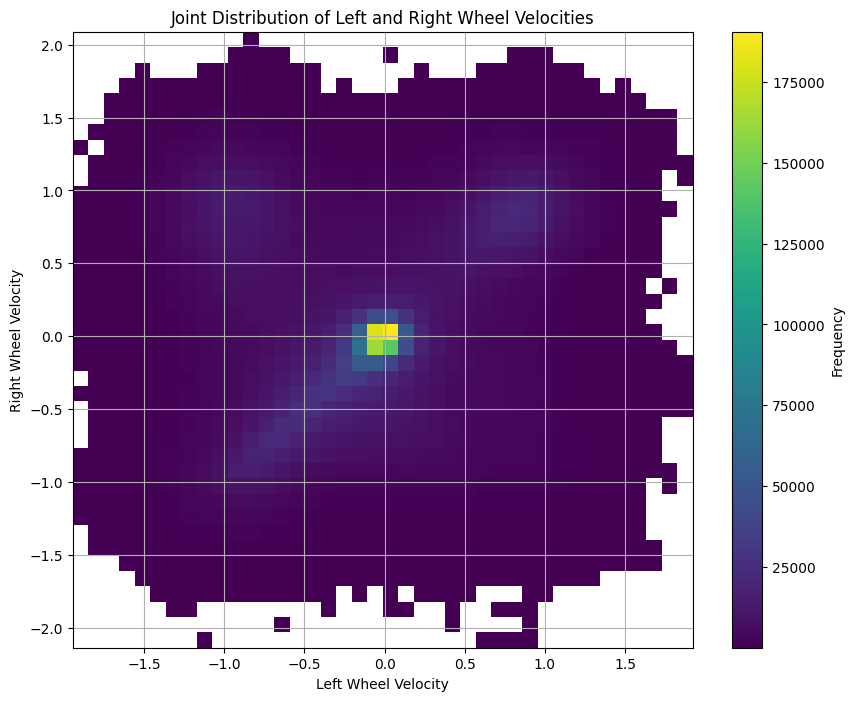

In [8]:

plot_action_frequency_heatmap(training_data['actions'])

In [9]:
def plot_state_transitions(states):
    states = np.array(states)
    plt.figure(figsize=(12, 10))
    if states.shape[1] >= 2:
        # Using the first two dimensions for x, y plotting
        plt.plot(states[:, 0], states[:, 1], 'r-', label='Path')
        plt.scatter(states[:, 0], states[:, 1], c=np.linspace(0, 1, len(states)), cmap='viridis', s=50, edgecolor='black', label='States over Time')
        plt.colorbar(label='Time Step')
        plt.title('Robot Path in Environment')
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.grid(True)
        plt.legend()
        plt.show()
    else:
        plt.plot(states, np.arange(len(states)), 'r-', label='Path')
        plt.scatter(states, np.arange(len(states)), c=np.linspace(0, 1, len(states)), cmap='viridis', label='States over Time')
        plt.colorbar(label='Time Step')
        plt.title('State Transitions')
        plt.xlabel('State Dimension 1')
        plt.ylabel('State Dimension 2' if states.shape[1] >= 2 else 'Time Step')
        plt.grid(True)
        plt.legend()
        plt.show()

In [10]:
plot_state_transitions(training_data['states'])

/home/deep/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


: 

In [8]:
def load_and_simulate(env, agent, n_episodes=5, max_steps=1000):
    states = []
    actions = []
    rewards = []
    steps_per_episode = []

    for episode in range(n_episodes):
        state, info = env.reset()
        done = False
        total_reward = 0
        steps = 0

        while not done and steps < max_steps:
            env.render()  # Optional: Comment this out if you don't need to visually inspect the simulation
            action = agent.choose_action(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            total_reward += reward
            steps += 1

            states.append(state)
            actions.append(action)

        rewards.append(total_reward)
        steps_per_episode.append(steps)

        print(f"Episode {episode + 1}: Total reward = {total_reward}, Steps = {steps}")

    env.close()  # Close the environment when done
    return states, actions, rewards, steps_per_episode


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_policy_heatmap(states, actions, env_width, env_height, grid_size=(40, 40)):
    # Define the grid edges based on the environment dimensions
    x_edges = np.linspace(0, env_width, grid_size[0] + 1)
    y_edges = np.linspace(0, env_height, grid_size[1] + 1)

    # Initialize the policy grid for each action dimension
    policy_grid_left = np.zeros(grid_size, dtype=np.float64)
    policy_grid_right = np.zeros(grid_size, dtype=np.float64)
    
    # Initialize count grid to track number of entries per cell for averaging
    count_grid = np.zeros(grid_size, dtype=np.int32)

    # Process each state and corresponding action
    for state, action in zip(states, actions):
        x_idx = np.digitize(state[0], x_edges) - 1  # X coordinate
        y_idx = np.digitize(state[1], y_edges) - 1  # Y coordinate

        # Ensure indices are within the grid bounds
        x_idx = max(0, min(x_idx, grid_size[0] - 1))
        y_idx = max(0, min(y_idx, grid_size[1] - 1))

        # Sum actions at this grid location
        policy_grid_left[y_idx, x_idx] += action[0]
        policy_grid_right[y_idx, x_idx] += action[1]
        count_grid[y_idx, x_idx] += 1

    # Normalize the policy grid by the counts to get mean actions
    policy_grid_left /= np.maximum(count_grid, 1)  # avoid division by zero
    policy_grid_right /= np.maximum(count_grid, 1)  # avoid division by zero

    return policy_grid_left, policy_grid_right

def plot_policy_heatmap(policy_grid_left, policy_grid_right, title='Policy Heatmap'):
    fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

    sns.heatmap(policy_grid_left, ax=axs[0], cmap='viridis', cbar=True)
    axs[0].set_title('Left Wheel Velocity')
    axs[0].set_xlabel('X Coordinate')
    axs[0].set_ylabel('Y Coordinate')

    sns.heatmap(policy_grid_right, ax=axs[1], cmap='viridis', cbar=True)
    axs[1].set_title('Right Wheel Velocity')
    axs[1].set_xlabel('X Coordinate')
    axs[1].set_ylabel('Y Coordinate')

    plt.suptitle(title)
    plt.show()


Episode 1: Total reward = -331.1421831261617, Steps = 433
Episode 2: Total reward = -156.86811935208962, Steps = 82
Episode 3: Total reward = -130.7105882826435, Steps = 36
Episode 4: Total reward = -297.103941338933, Steps = 500
Episode 5: Total reward = -133.30613590435212, Steps = 63


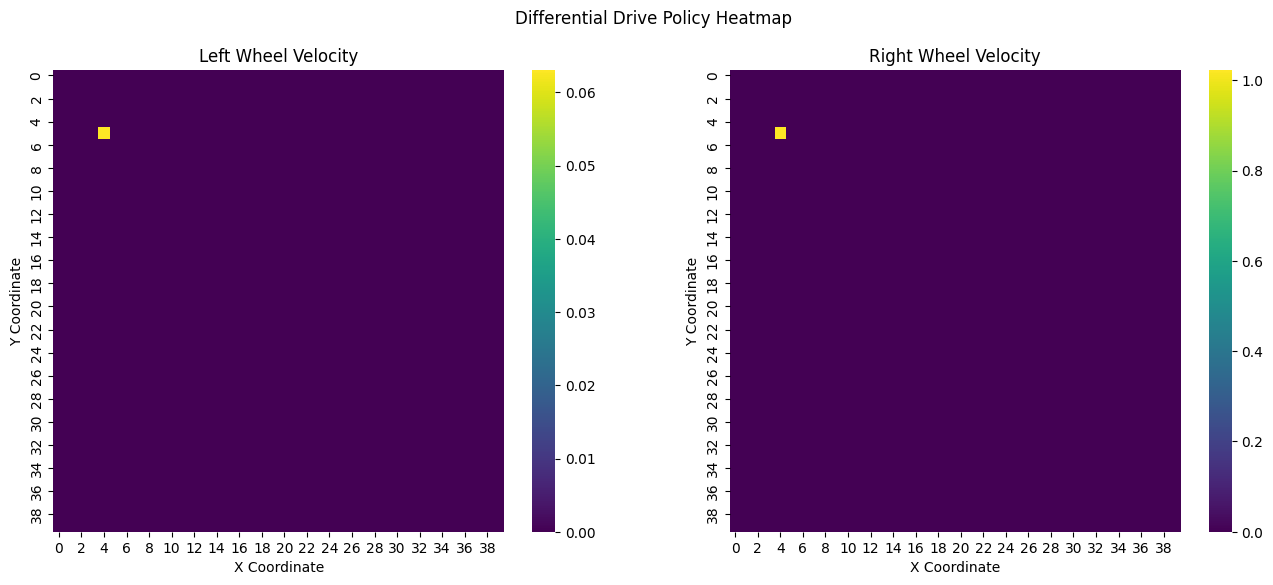

In [11]:
def main():
    env = EscapeRoomEnv(max_steps_per_episode=500, goal= (550,450))
    agent = Agent(
        alpha=0.0001,
        beta=0.001,
        input_dims=env.observation_space.shape,
        tau=0.001,
        fc1_dims=400,
        fc2_dims=300,
        n_actions=env.action_space.shape[0],
        batch_size=64,
    )

     # Assume agent.load_models is properly implemented
    agent.load_models()

    states, actions, rewards, steps_per_episode = load_and_simulate(env, agent, n_episodes=5, max_steps=1000)

    policy_grid_left, policy_grid_right = create_policy_heatmap(states, actions, ENV_WIDTH, ENV_HEIGHT)
    plot_policy_heatmap(policy_grid_left, policy_grid_right, title='Differential Drive Policy Heatmap')
    

if __name__ == "__main__":
    main()
